In [200]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [201]:
train=pd.read_csv("C:\madhan\Downloads\Train (2).csv")
test=pd.read_csv("C:\madhan\Downloads\Test (1).csv")
samp=pd.read_csv("C:\madhan\Downloads\sample.csv")

In [202]:
MK=pd.concat([train,test],ignore_index=True)
MK.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [203]:
MK.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Global_Sales
count,16450.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,14576.000000
mean,2006.487356,0.263330,0.145025,0.077602,68.967679,26.360821,162.229908,0.598972
std,5.878995,0.813514,0.503283,0.308818,13.938165,18.980495,561.282326,1.647699
min,1980.000000,0.000000,0.000000,0.000000,13.000000,3.000000,4.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,60.000000,12.000000,10.000000,0.050000
50%,2007.000000,0.080000,0.020000,0.000000,71.000000,21.000000,24.000000,0.220000
75%,2010.000000,0.240000,0.110000,0.040000,79.000000,36.000000,81.000000,0.550000
max,2020.000000,41.360000,28.960000,10.220000,98.000000,113.000000,10665.000000,82.530000


In [204]:
MK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   Critic_Count     8137 non-null   float64
 10  User_Score       10015 non-null  object 
 11  User_Count       7590 non-null   float64
 12  Developer        10096 non-null  object 
 13  Rating           9950 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.9+ MB


In [205]:
MK.shape

(16719, 15)

# DATA CLEANING AND DATA VISUALISATION


In [206]:
MK.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
Global_Sales       2143
dtype: int64

In [207]:
MK=MK.dropna()
MK.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64

In [208]:
MK.shape

(6125, 15)

# boxplots

In [209]:
Q1=MK.NA_Sales.quantile(0.25)
Q3=MK.NA_Sales.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
MK.NA_Sales[MK.NA_Sales>UE]=UE
MK.NA_Sales[MK.NA_Sales<LE]=LE

0.08 0.44 0.36 0.98 -0.46


C:\Users\madhan\AppData\Local\Temp/ipykernel_10952/178896627.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MK.NA_Sales[MK.NA_Sales<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x217431eed00>,
 'caps': [<matplotlib.lines.Line2D at 0x217431fd460>,
 'boxes': [<matplotlib.lines.Line2D at 0x217431ee970>],
 'medians': [<matplotlib.lines.Line2D at 0x217431fdaf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x217431fde80>],
 'means': []}

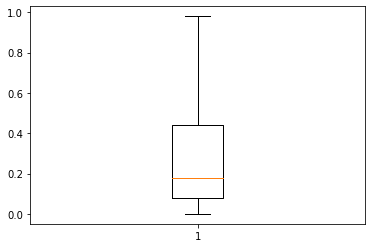

In [210]:
plt.boxplot(MK.NA_Sales)

In [211]:
Q1=MK.Year_of_Release.quantile(0.25)
Q3=MK.Year_of_Release.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
MK.Year_of_Release[MK.Year_of_Release>UE]=UE
MK.Year_of_Release[MK.Year_of_Release<LE]=LE

2004.0 2011.0 7.0 2021.5 1993.5


C:\Users\madhan\AppData\Local\Temp/ipykernel_10952/2402481016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MK.Year_of_Release[MK.Year_of_Release<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x217432984c0>,
 'caps': [<matplotlib.lines.Line2D at 0x21743298be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21743298130>],
 'medians': [<matplotlib.lines.Line2D at 0x217432a4340>],
 'fliers': [<matplotlib.lines.Line2D at 0x217432a46d0>],
 'means': []}

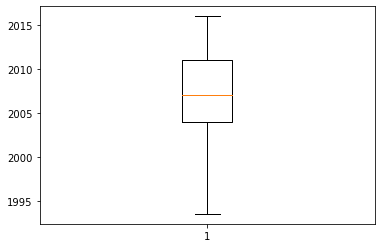

In [212]:
plt.boxplot(MK.Year_of_Release)

0.02 0.24 0.22 0.5700000000000001 -0.31


C:\Users\madhan\AppData\Local\Temp/ipykernel_10952/3716570455.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MK.EU_Sales[MK.EU_Sales<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x217432fe2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x217432fea00>,
 'boxes': [<matplotlib.lines.Line2D at 0x217432eff10>],
 'medians': [<matplotlib.lines.Line2D at 0x21743309160>],
 'fliers': [<matplotlib.lines.Line2D at 0x217433094f0>],
 'means': []}

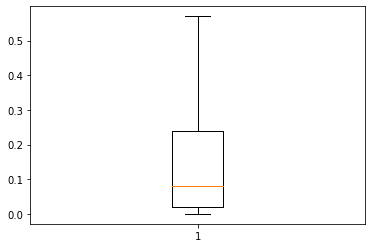

In [213]:
Q1=MK.EU_Sales.quantile(0.25)
Q3=MK.EU_Sales.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
MK.EU_Sales[MK.EU_Sales>UE]=UE
MK.EU_Sales[MK.EU_Sales<LE]=LE
plt.boxplot(MK.EU_Sales)

In [214]:
Q1=MK.JP_Sales.quantile(0.25)
Q3=MK.JP_Sales.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
MK.JP_Sales[MK.JP_Sales>UE]=UE
MK.JP_Sales[MK.JP_Sales<LE]=LE

0.0 0.02 0.02 0.05 -0.03


C:\Users\madhan\AppData\Local\Temp/ipykernel_10952/1623783664.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MK.JP_Sales[MK.JP_Sales<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x2174335a430>,
 'caps': [<matplotlib.lines.Line2D at 0x2174335ab50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2174335a0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x217433682b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21743368640>],
 'means': []}

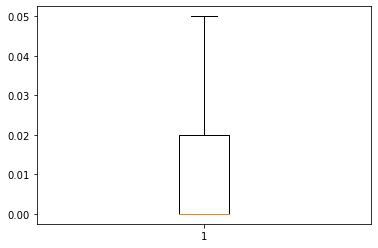

In [215]:
plt.boxplot(MK.JP_Sales)

In [216]:
Q1=MK.Critic_Score.quantile(0.25)
Q3=MK.Critic_Score.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
MK.Critic_Score[MK.Critic_Score>UE]=UE
MK.Critic_Score[MK.Critic_Score<LE]=LE

63.0 81.0 18.0 108.0 36.0


C:\Users\madhan\AppData\Local\Temp/ipykernel_10952/2681925505.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MK.Critic_Score[MK.Critic_Score<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x217433b9b50>,
 'caps': [<matplotlib.lines.Line2D at 0x217433c72b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217433b97c0>],
 'medians': [<matplotlib.lines.Line2D at 0x217433c79d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x217433c7d60>],
 'means': []}

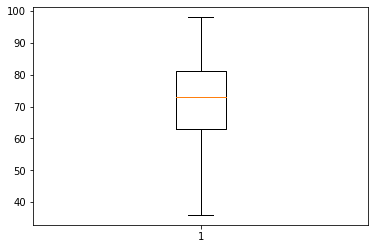

In [217]:
plt.boxplot(MK.Critic_Score)

In [218]:
Q1=MK.Critic_Count.quantile(0.25)
Q3=MK.Critic_Count.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
MK.Critic_Count[MK.Critic_Count>UE]=UE
MK.Critic_Count[MK.Critic_Count<LE]=LE

15.0 41.0 26.0 80.0 -24.0


C:\Users\madhan\AppData\Local\Temp/ipykernel_10952/3683188274.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MK.Critic_Count[MK.Critic_Count<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x21743420c40>,
 'caps': [<matplotlib.lines.Line2D at 0x217434303a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217434208b0>],
 'medians': [<matplotlib.lines.Line2D at 0x21743430ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21743430e50>],
 'means': []}

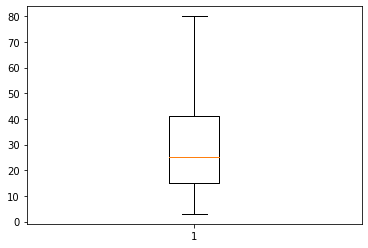

In [219]:
plt.boxplot(MK.Critic_Count)

In [220]:
Q1=MK.User_Count.quantile(0.25)
Q3=MK.User_Count.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
MK.User_Count[MK.User_Count>UE]=UE
MK.User_Count[MK.User_Count<LE]=LE

12.0 98.0 86.0 227.0 -117.0


C:\Users\madhan\AppData\Local\Temp/ipykernel_10952/3693292012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MK.User_Count[MK.User_Count<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x217448b6790>,
 'caps': [<matplotlib.lines.Line2D at 0x217448b6eb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217448b6400>],
 'medians': [<matplotlib.lines.Line2D at 0x217448c1610>],
 'fliers': [<matplotlib.lines.Line2D at 0x217448c19a0>],
 'means': []}

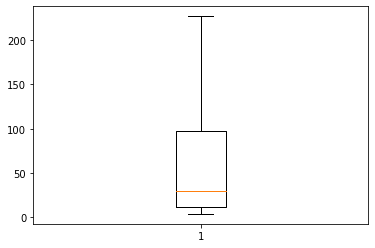

In [221]:
plt.boxplot(MK.User_Count)

In [222]:
Q1=MK.Global_Sales.quantile(0.25)
Q3=MK.Global_Sales.quantile(0.75)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)
print(Q1,Q3,IQR,UE,LE)
MK.Global_Sales[MK.Global_Sales>UE]=UE
MK.Global_Sales[MK.Global_Sales<LE]=LE

0.15 0.87 0.72 1.9500000000000002 -0.93


C:\Users\madhan\AppData\Local\Temp/ipykernel_10952/2719334035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MK.Global_Sales[MK.Global_Sales<LE]=LE


{'whiskers': [<matplotlib.lines.Line2D at 0x21744914c70>,
 'caps': [<matplotlib.lines.Line2D at 0x217449243d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217449148e0>],
 'medians': [<matplotlib.lines.Line2D at 0x21744924af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21744924e80>],
 'means': []}

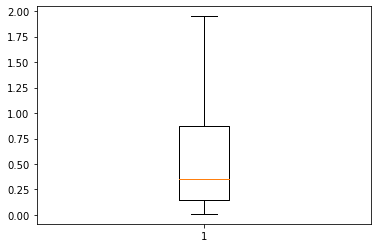

In [223]:
plt.boxplot(MK.Global_Sales)

#DATA VISUALISATION

<AxesSubplot:xlabel='Publisher', ylabel='count'>

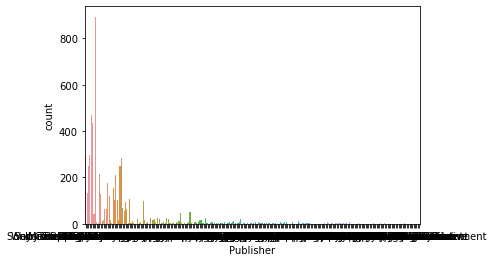

In [224]:
sns.countplot(x="Publisher",data=MK)

<Figure size 432x504 with 0 Axes>

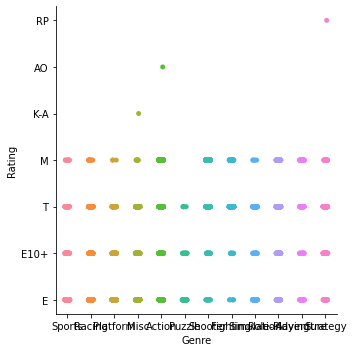

In [225]:
plt.figure(figsize=(6,7))
sns.catplot(x="Genre",y="Rating",data=MK)

# #CREATING DUMMY VALUES

In [226]:
x=MK.drop(["Name","Year_of_Release","Publisher","Global_Sales"],axis=1)
y=MK.Global_Sales
x.head()

,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii,Sports,0.98,0.57,0.05,76.0,51.0,8,227.0,Nintendo,E
2,Wii,Racing,0.98,0.57,0.05,82.0,73.0,8.3,227.0,Nintendo,E
3,Wii,Sports,0.98,0.57,0.05,80.0,73.0,8,192.0,Nintendo,E
6,DS,Platform,0.98,0.57,0.05,89.0,65.0,8.5,227.0,Nintendo,E
7,Wii,Misc,0.98,0.57,0.05,58.0,41.0,6.6,129.0,Nintendo,E


In [227]:
y.head()

0    1.95
2    1.95
3    1.95
6    1.95
7    1.95
Name: Global_Sales, dtype: float64

In [228]:
MS=pd.get_dummies(x)
MS.head()

,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Count,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,0.98,0.57,0.05,76.0,51.0,227.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.98,0.57,0.05,82.0,73.0,227.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.98,0.57,0.05,80.0,73.0,192.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0.98,0.57,0.05,89.0,65.0,227.0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
7,0.98,0.57,0.05,58.0,41.0,129.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [229]:
MS.shape

(6125, 1334)

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(MS)
scaled_data=scaler.transform(MS)

In [231]:
MS= pd.DataFrame(scaled_data)
MS.head()

,0,1,2,3,4,5,6,7,8,9,...,1324,1325,1326,1327,1328,1329,1330,1331,1332,1333
0,1.0,1.0,1.0,0.645161,0.623377,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.741935,0.909091,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.709677,0.909091,0.843049,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.854839,0.805195,1.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.354839,0.493506,0.560538,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# train

In [232]:
train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,NaN,NaN,NaN,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,NaN,NaN,NaN,NaN,NaN,NaN,31.37


In [233]:
train.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Developer', 'Rating', 'Global_Sales'],
      dtype='object')

In [234]:
xtrain=train.iloc[0:3000]

In [235]:
trainA=train.drop(["Name","Global_Sales","Publisher","Platform","Genre","Developer","Rating"],axis=1)
trainB=train.Global_Sales

In [236]:
trainA.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,76.0,51.0,8,322.0
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,80.0,73.0,8,192.0
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN


In [237]:
trainB.head()

0    82.53
1    40.24
2    35.52
3    32.77
4    31.37
Name: Global_Sales, dtype: float64

In [238]:
train.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

In [239]:
trainA=train.dropna()

In [240]:
train.isnull().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

<AxesSubplot:xlabel='Genre', ylabel='count'>

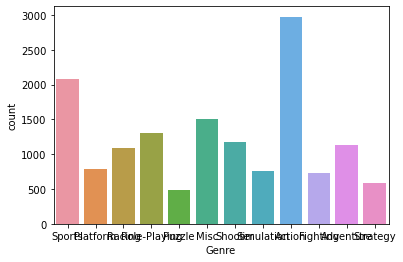

In [241]:
sns.countplot(x="Genre",data=train)

In [242]:
trainA=sm.add_constant(trainA)

C:\Users\madhan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [243]:
trainA.head()

,const,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,76.0,51.0,8,322.0,Nintendo,E,82.53
2,1.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,82.0,73.0,8.3,709.0,Nintendo,E,35.52
3,1.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,80.0,73.0,8,192.0,Nintendo,E,32.77
6,1.0,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,89.0,65.0,8.5,431.0,Nintendo,E,29.80
7,1.0,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,58.0,41.0,6.6,129.0,Nintendo,E,28.92


# test

In [244]:
test.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E


In [245]:
test.shape

(2143, 14)

In [246]:
test1=test.dropna()

In [247]:
test1.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
13,Hulk Hogan's Main Event,X360,2011.0,Fighting,505 Games,0.10,0.02,0.0,26.0,4.0,2.2,20.0,Panic Button,T
16,Retro Atari Classics,DS,2005.0,Misc,Atari,0.12,0.00,0.0,51.0,17.0,3.7,7.0,Taniko,E
18,Need for Speed Underground 2,DS,2005.0,Racing,Electronic Arts,0.11,0.02,0.0,65.0,13.0,7,25.0,EA Canada,E
20,Ys: The Ark of Napishtim,PS2,2005.0,Role-Playing,Konami Digital Entertainment,0.07,0.05,0.0,72.0,35.0,8.8,14.0,Falcom,T


In [248]:
testA=test1.drop(['Rating','Name','Platform','Genre','Publisher','Developer'],axis=1)
testB=test1.Rating

In [249]:
testA=sm.add_constant(x_test)
testA.head()

C:\Users\madhan\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count
3,1.0,2008.0,0.11,0.01,0.0,49.0,22.0,7.1,7.0
13,1.0,2011.0,0.10,0.02,0.0,26.0,4.0,2.2,20.0
16,1.0,2005.0,0.12,0.00,0.0,51.0,17.0,3.7,7.0
18,1.0,2005.0,0.11,0.02,0.0,65.0,13.0,7,25.0
20,1.0,2005.0,0.07,0.05,0.0,72.0,35.0,8.8,14.0


In [250]:
from sklearn.decomposition import PCA

In [251]:
pca=PCA()
pca.fit(testA)

PCA()

In [252]:
ratio=pca.explained_variance_ratio_

In [253]:
ratio.shape

(9,)

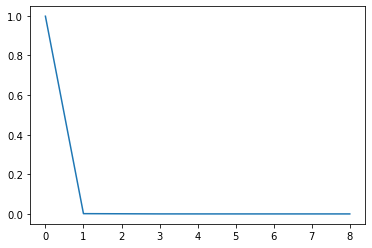

In [254]:
plt.plot(ratio)

In [255]:
import numpy as np
ratio_cum=np.cumsum(ratio)

In [256]:
np.cumsum(ratio)

array([0.99781096, 0.99916221, 0.99989284, 0.99999201, 0.99999999,
       1.        , 1.        , 1.        , 1.        ])

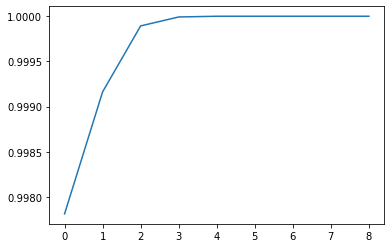

In [257]:
plt.plot(ratio_cum)

In [258]:
pca=PCA(n_components=5).fit(x_test)
component=pca.transform(x_test)

In [259]:
components=pd.DataFrame(component)

In [260]:
components.head()

,0,1,2,3,4
0,-71.550500,11.778159,8.910130,-0.636236,-1.171662
1,-58.738977,41.103243,5.705134,-3.990169,1.893151
2,-71.557266,12.883657,3.634944,2.004213,2.507779
3,-53.486195,2.950917,-7.138347,1.911362,0.142449
4,-64.378175,-14.625585,7.958795,2.425911,-1.075568


In [261]:
components.shape

(700, 5)

In [266]:

trainA=train.drop(["Name","Platform","Genre","Publisher","Developer","Rating","Global_Sales"],axis=1)

In [267]:
trainA.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006.0,41.36,28.96,3.77,76.0,51.0,8,322.0
1,1985.0,29.08,3.58,6.81,NaN,NaN,NaN,NaN
2,2008.0,15.68,12.76,3.79,82.0,73.0,8.3,709.0
3,2009.0,15.61,10.93,3.28,80.0,73.0,8,192.0
4,1996.0,11.27,8.89,10.22,NaN,NaN,NaN,NaN


# LogisticRegression

In [272]:
model = LogisticRegression()
model.fit(testA,testB)

C:\Users\madhan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [280]:
A_cv=testA
B_cv=testB


In [282]:
predictB=model.predict(A_cv)

In [284]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(B_cv,predictB)

In [285]:
print("accuracy on cv",acc*100,'%')

accuracy on cv 43.142857142857146 %


# sample

In [286]:
samp=pd.read_csv("C:\madhan\Downloads\sample.csv")

In [287]:
samp.head()

,Name,Global sales
0,Nicktoons: MLB,0.09
1,Shonen Jump's One Piece: Grand Battle,0.17
2,Learn Math,0.11
3,Nitrobike,0.08
4,Cruise Ship Vacation Games,0.15


In [289]:
samp.shape

(2143, 2)

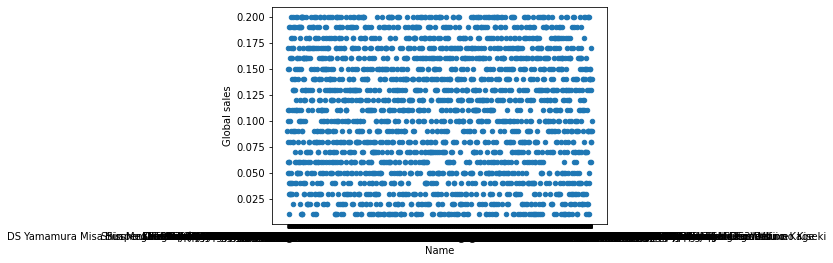

In [290]:
samp.plot(kind="scatter",x="Name",y="Global sales");

array([[<AxesSubplot:title={'center':'Global sales'}>]], dtype=object)

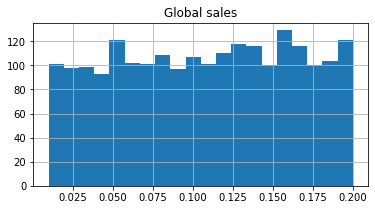

In [291]:
samp.hist(figsize=(6,3),bins=20)

In [294]:
samp.corr()


,Global sales
Global sales,1.0
